In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import folium
from folium import plugins
from folium.plugins import HeatMap

In [5]:
data = pd.read_csv('../data/time_series_covid19_deaths_global_iso3_regions.csv')

In [6]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120.0,122.0,127.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,502.0,507.0,515.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,48.0,48.0,AND,150,Europe,39,Southern Europe,NaN,NaN


### Size of data

In [6]:
len(data)

267

In [7]:
len(data.columns)

115

## Top countries

In [8]:
newest_total = data.groupby(['Country/Region']).sum().iloc[:,-1]

In [9]:
newest =  data.iloc[:,[1,-1]]

In [10]:
newest_total.head()

Country/Region
#country+name      0.0
Afghanistan       90.0
Albania           31.0
Algeria          465.0
Andorra           45.0
Name: 5/4/20, dtype: float64

In [11]:
only_top = newest_total.where(lambda x : x>100).dropna()

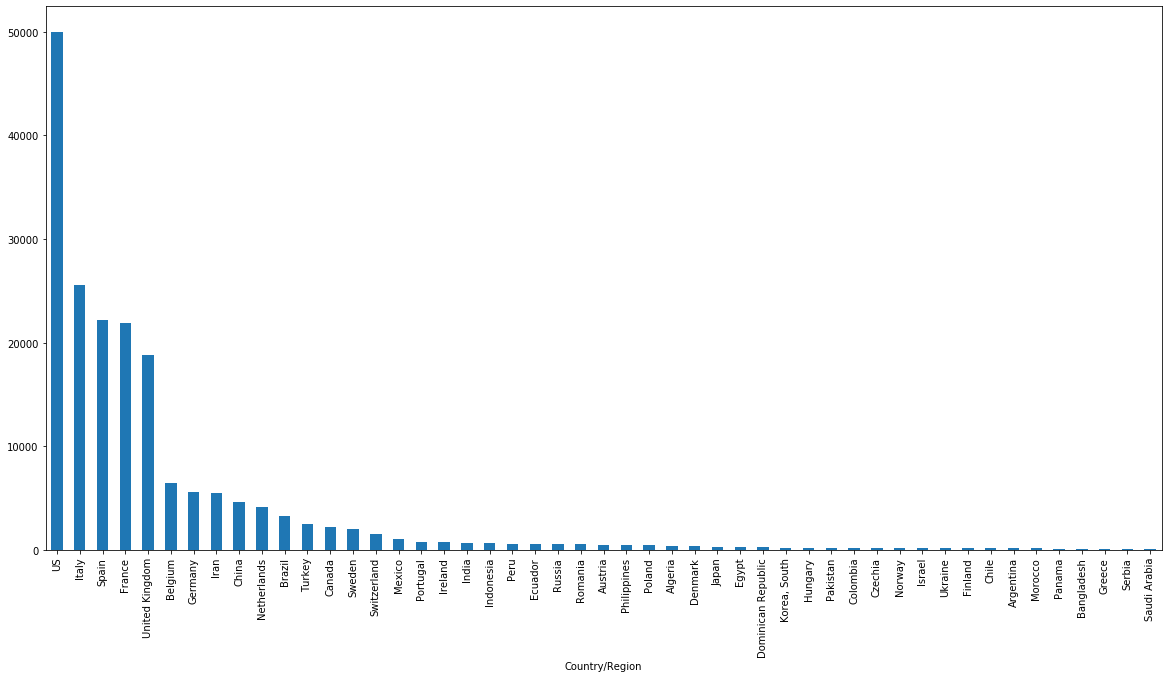

In [10]:
only_top.sort_values(ascending=False).plot.bar(x = 'Country/Region', y='0', figsize=(20,10))

In [11]:
top_10 = list(newest_total.sort_values(ascending=False).keys()[:10])
top_10

['US',
 'Italy',
 'Spain',
 'France',
 'United Kingdom',
 'Belgium',
 'Germany',
 'Iran',
 'China',
 'Netherlands']

In [12]:
top_10_data = data[data['Country/Region'].isin(top_10)]

# Deaths per million

Source: https://github.com/datasets/population

In [13]:
population_data = pd.read_csv('population.csv')

In [14]:
population[population['Country/Region'].str.contains('Bahamas')]

NameError: name 'population' is not defined

In [ ]:
newest = population_data.Year.max()
population = population_data[population_data.Year == newest].reset_index().drop(columns=['index','Year'])
population = population.rename(columns={'Country Code': 'ISO 3166-1 Alpha 3-Codes' })


In [ ]:
merged_data = data.merge(population, on=['ISO 3166-1 Alpha 3-Codes']).rename(columns={'Value': 'Population' })

In [ ]:
newest =  merged_data.iloc[:,[1,-2]]

In [ ]:
newest_with_population = merged_data.groupby(['Country/Region']).sum().iloc[:,[-2,-1]].rename(columns={'4/20/20': 'Deaths' })

In [ ]:
newest_with_population.head()

In [ ]:
deaths_per_million = newest_with_population['Deaths']/(newest_with_population['Population']/1000000)

In [ ]:
deaths_per_million.head()

In [ ]:
deaths_per_million_top = deaths_per_million.where(lambda x : x>100).dropna()

In [ ]:
deaths_per_million_top.sort_values(ascending=False).plot.bar(x = 'Country/Region', y='0', figsize=(20,10))

# Countries with no deaths

In [ ]:
newest_total.where(lambda x : x==0).dropna()

In [8]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120.0,122.0,127.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,502.0,507.0,515.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,48.0,48.0,AND,150,Europe,39,Southern Europe,NaN,NaN


## World map with indicators for death count

In [7]:
world_map = folium.Map([40, 0],tiles = "Stamen Terrain", zoom_start=2)
for index,row in data.iterrows(): 
    folium.CircleMarker([row.Lat, row.Long],
                    radius=row[data.columns[-1]]/1000,
                    popup='',
                    fill=True, # Set fill to True
                    fill_color='red',
                    color='red',
                    weight=0.1,
                    fill_opacity=0.6
                    ).add_to(world_map)
world_map

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Countermeassures

In [ ]:
countermeassures = pd.read_csv('countermeasures_db_johnshopkins_2020_03_30.csv')

In [ ]:
countermeassures

In [ ]:
len(countermeassures)

In [ ]:
len(countermeassures.columns)

In [ ]:
countermeassures.columns

.

.

.

## Testing 